In [3]:
#%matplotlib widget

import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import auxFuncs as aux
import HbXConcentrations as hbx

In [4]:
# Load sample MC simulations

imagesMC1_Sep1, shapeImagesMC1_Sep1 = aux.loadMatStruct("Tomo_DosInc_reg_660_sep10_mm_v2.mat", "flux")
imagesMC2_Sep1, shapeImagesMC2_Sep1 = aux.loadMatStruct("Tomo_DosInc_reg_830_sep10_mm_v2.mat", "flux")

imagesMC1_Sep2, shapeImagesMC1_Sep2 = aux.loadMatStruct("Tomo_DosInc_reg_660_sep20_mm_v2.mat", "flux")
imagesMC2_Sep2, shapeImagesMC2_Sep2 = aux.loadMatStruct("Tomo_DosInc_reg_830_sep20_mm_v2.mat", "flux")

imagesMC1_Sep3, shapeImagesMC1_Sep3 = aux.loadMatStruct("Tomo_DosInc_reg_660_sep30_mm_v2.mat", "flux")
imagesMC2_Sep3, shapeImagesMC2_Sep3 = aux.loadMatStruct("Tomo_DosInc_reg_830_sep30_mm_v2.mat", "flux")

In [5]:
sigmaGauss = 12
fftStrength = 2
cropSizeX = 70
cropSizeY = 70
maxDev = 5
doTotMap = False
doSatMap = True

# Separation  1

In [6]:
# Perfom smoothing

for i in range(shapeImagesMC1_Sep1[0]):
    imagesMC1_Sep1[i] = aux.fftGauss(imagesMC1_Sep1[i], fftStrength)[0]
    
for i in range(shapeImagesMC2_Sep1[0]):
    imagesMC2_Sep1[i] = aux.fftGauss(imagesMC2_Sep1[i], fftStrength)[0]

/home/nicolas/Bionirs/MamoRefCodePublic/auxFuncs.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  im_output[~in_NaNs] = im_filtered[~in_NaNs]


In [7]:
# Compute source centers

centersPos1 = np.empty((shapeImagesMC1_Sep1[0],2))
centersPos2 = np.empty((shapeImagesMC2_Sep1[0],2))

for i in range(shapeImagesMC1_Sep1[0]):
    centersPos1[i] = aux.maxPosCm(imagesMC1_Sep1[i], smooth=0)
    
for i in range(shapeImagesMC2_Sep1[0]):
    centersPos2[i] = aux.maxPosCm(imagesMC2_Sep1[i], smooth=0)

In [8]:
# Compute centered crops

imagesCentered1 = []
imagesCentered2 = []

for i, image in enumerate(imagesMC1_Sep1):
    imageTemp = aux.cropAroundPosition(image, round(centersPos1[i][1]), round(centersPos1[i][0]), cropSizeX, cropSizeY) 
    imagesCentered1.append(imageTemp) 

for i, image in enumerate(imagesMC2_Sep1):
    imageTemp = aux.cropAroundPosition(image, round(centersPos2[i][1]), round(centersPos2[i][0]), cropSizeX, cropSizeY) 
    imagesCentered2.append(imageTemp)  

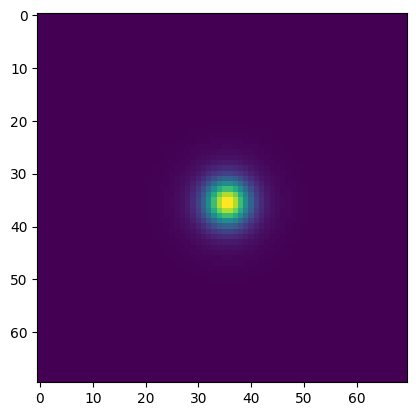

In [9]:
# Generate background normalization image

plt.figure()
back1 = np.nanmean(imagesCentered1, axis=0)
back2 = np.nanmean(imagesCentered2, axis=0)
plt.imshow(back1)

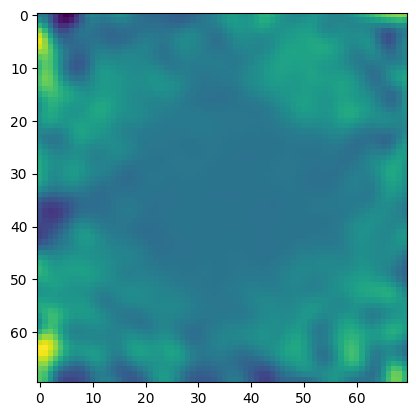

In [10]:
# Compute normalized crops
plt.figure()
imagesDiv1 = imagesCentered1/back1
imagesDiv2 = imagesCentered2/back2
plt.imshow(imagesDiv1[12])

plt.show()

In [11]:
# Generate 2D reconstruction using gaussian weights

gaussianWeights = aux.gaussian2D(cropSizeX,cropSizeY,int(cropSizeX/2),int(cropSizeX/2),sigma=sigmaGauss,muu=0,contrast=0)

recon2DAll1, recon2DAllCount1 = aux.recon2D(imagesDiv1, centersPos1, weights=gaussianWeights)
recon2DAll2, recon2DAllCount2 = aux.recon2D(imagesDiv2, centersPos2, weights=gaussianWeights)

#recon2DAll1, recon2DAllCount1 = aux.recon2D(imagesDiv1, centersPos1)
#recon2DAll2, recon2DAllCount2 = aux.recon2D(imagesDiv2, centersPos2)


36it [00:00, 76.03it/s]
/home/nicolas/Bionirs/MamoRefCodePublic/auxFuncs.py:233: RuntimeWarning: invalid value encountered in divide
  imageRecon = imageReconTemp/imageReconCount
36it [00:00, 80.64it/s]


In [12]:
offsetX = 250 - np.shape(recon2DAll1)[0]
offsetY = 250 - np.shape(recon2DAll1)[1]

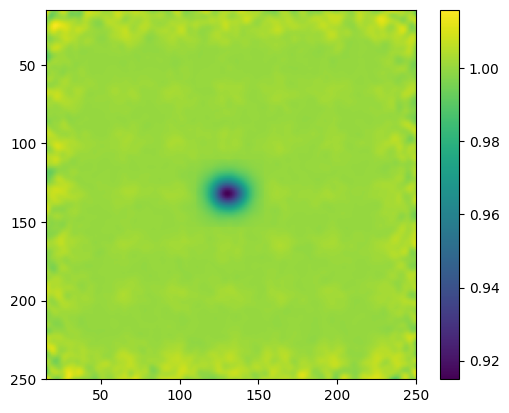

In [13]:
plt.figure()

minValPos = 15

extent = [minValPos , 250, 250, minValPos]

recon2DCrop1 = recon2DAll1[minValPos:,minValPos:]
plt.imshow(recon2DCrop1, extent=extent)
plt.colorbar()

plt.show()

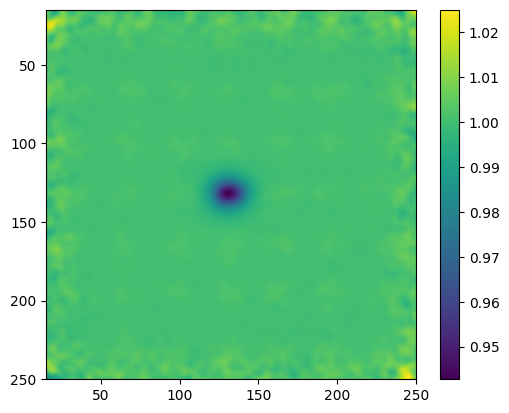

In [14]:
plt.figure()

recon2DCrop2 = recon2DAll2[minValPos:,minValPos:]
plt.imshow(recon2DCrop2, extent=extent)
plt.colorbar()

plt.show()

In [15]:
imRaw = np.zeros((np.shape(recon2DCrop1)[0], np.shape(recon2DCrop1)[1], 2))
imRaw[:,:,0] = recon2DCrop1
imRaw[:,:,1] = recon2DCrop2

lambdas = [660, 830]

cropSize = 100

HbXMaps_2D = hbx.MamoRef_dHbX(imRaw, lambdas, centersPos1, cropSize, cropSize)
    
desOxyMap_2D_Sep1 = HbXMaps_2D[:,:,1]
OxyMap_2D_Sep1 = HbXMaps_2D[:,:,0]
TotMap_2D_Sep1 = desOxyMap_2D_Sep1 + OxyMap_2D_Sep1

Step 1/2...


100%|██████████| 100/100 [00:06<00:00, 15.54it/s]


Step 2/2...


100%|██████████| 36/36 [00:11<00:00,  3.11it/s]
/home/nicolas/Bionirs/MamoRefCodePublic/HbXConcentrations.py:162: RuntimeWarning: invalid value encountered in divide
  LL = LL/cont


In [16]:
#desOxyMap_2D_filtered = ndimage.median_filter(desOxyMap_2D,0)
#OxyMap_2D_filtered = ndimage.median_filter(OxyMap_2D,0)

desOxyMap_2D_filtered_Sep1 = desOxyMap_2D_Sep1
OxyMap_2D_filtered_Sep1 = OxyMap_2D_Sep1

desOxyMap_2D_filtered_Sep1[desOxyMap_2D_filtered_Sep1==np.nan] = 0
OxyMap_2D_filtered_Sep1[OxyMap_2D_filtered_Sep1==np.nan] = 0

In [17]:
sep = 10
size = 250

xPosInc1 = int(np.shape(OxyMap_2D_filtered_Sep1)[0]/2 - sep/2)
xPosInc2 = int(np.shape(OxyMap_2D_filtered_Sep1)[0]/2 + sep/2)
yPosInc1 = yPosInc2 = int(np.shape(OxyMap_2D_filtered_Sep1)[1]/2)
print(xPosInc1,xPosInc2)

posSep1Inc1 = [yPosInc1, xPosInc1]
posSep1Inc2 = [yPosInc2, xPosInc2]
satSep1Inc1 = aux.O2Sat(OxyMap_2D_filtered_Sep1[posSep1Inc1[0],posSep1Inc1[1]], desOxyMap_2D_filtered_Sep1[posSep1Inc1[0],posSep1Inc1[1]])
satSep1Inc2 = aux.O2Sat(OxyMap_2D_filtered_Sep1[posSep1Inc2[0],posSep1Inc2[1]], desOxyMap_2D_filtered_Sep1[posSep1Inc2[0],posSep1Inc2[1]])

print("O2 Saturation. Inclusion 1: {}".format(satSep1Inc1))
print("O2 Saturation. Inclusion 2: {}".format(satSep1Inc2))

104 114
O2 Saturation. Inclusion 1: 65.0
O2 Saturation. Inclusion 2: 68.0


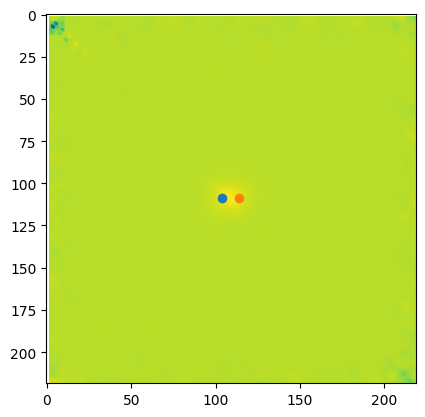

In [18]:
plt.figure()
plt.imshow(OxyMap_2D_filtered_Sep1)
plt.scatter(posSep1Inc1[1],posSep1Inc1[0])
plt.scatter(posSep1Inc2[1],posSep1Inc2[0])
plt.show()

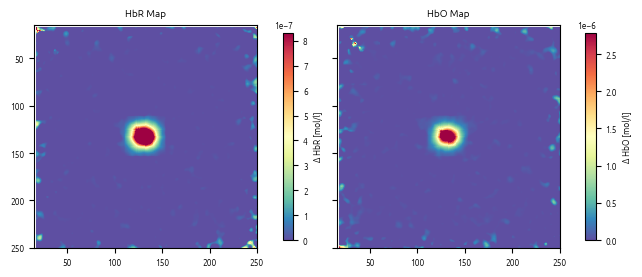

In [19]:
colorMap = "Spectral_r"
    
font = {'family' : 'ubuntu',
        'weight' : 'regular',
        'size'   : 6}

mp.rc('font', **font)


if doTotMap:
        figSats, ((DesOxy, Oxy, Tot)) = plt.subplots(1, 3, sharex=True, sharey=True)
        font["size"] = 6
        mp.rc('font', **font)
else:
        figSats, ((DesOxy,Oxy)) = plt.subplots(1, 2, sharex=True, sharey=True)

sd = np.nanstd(desOxyMap_2D_filtered_Sep1)
median = np.nanmedian(desOxyMap_2D_filtered_Sep1)
vmax = median + maxDev * sd
vmin = 0

figDesOxy = DesOxy.imshow(desOxyMap_2D_filtered_Sep1, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
c1 = figSats.colorbar(figDesOxy, ax=DesOxy, fraction=0.04, pad=0.1)
c1.set_label("Δ HbR [mol/l]")

sd = np.nanstd(OxyMap_2D_filtered_Sep1)
median = np.nanmedian(OxyMap_2D_filtered_Sep1)
vmax = median + maxDev * sd
vmin = 0


figOxy = Oxy.imshow(OxyMap_2D_filtered_Sep1, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
c2 = figSats.colorbar(figOxy, ax=Oxy, fraction=0.04, pad=0.1)
c2.set_label("Δ HbO [mol/l]")


if doTotMap:
        TotMap_2D_Sep1 = desOxyMap_2D_filtered_Sep1 + OxyMap_2D_filtered_Sep1

        sd = np.nanstd(TotMap_2D_Sep1)
        median = np.nanmedian(TotMap_2D_Sep1)
        vmax = median + maxDev * sd
        vmin = 0


        figTot = Tot.imshow(TotMap_2D_Sep1, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
        c3 = figSats.colorbar(figTot, ax=Tot, fraction=0.04, pad=0.1)
        c3.set_label("Δ HbTot [mol/l]")

        Tot.set_title("Total HB HBMap")


DesOxy.set_title("HbR Map")

Oxy.set_title("HbO Map")

figSats.tight_layout()

figSats.savefig("MC2Incs_HbXMaps_MultiSep_Sep1.png", dpi=300)

# Separation  2

In [20]:
# Perfom smoothing

for i in range(shapeImagesMC1_Sep2[0]):
    imagesMC1_Sep2[i] = aux.fftGauss(imagesMC1_Sep2[i], fftStrength)[0]
    
for i in range(shapeImagesMC2_Sep2[0]):
    imagesMC2_Sep2[i] = aux.fftGauss(imagesMC2_Sep2[i], fftStrength)[0]

In [21]:
# Compute source centers

centersPos1 = np.empty((shapeImagesMC1_Sep2[0],2))
centersPos2 = np.empty((shapeImagesMC2_Sep2[0],2))

for i in range(shapeImagesMC1_Sep2[0]):
    centersPos1[i] = aux.maxPosCm(imagesMC1_Sep2[i], smooth=0)
    
for i in range(shapeImagesMC2_Sep2[0]):
    centersPos2[i] = aux.maxPosCm(imagesMC2_Sep2[i], smooth=0)

In [22]:
# Compute centered crops

imagesCentered1 = []
imagesCentered2 = []

for i, image in enumerate(imagesMC1_Sep2):
    imageTemp = aux.cropAroundPosition(image, round(centersPos1[i][1]), round(centersPos1[i][0]), cropSizeX, cropSizeY) 
    imagesCentered1.append(imageTemp) 

for i, image in enumerate(imagesMC2_Sep2):
    imageTemp = aux.cropAroundPosition(image, round(centersPos2[i][1]), round(centersPos2[i][0]), cropSizeX, cropSizeY) 
    imagesCentered2.append(imageTemp)  

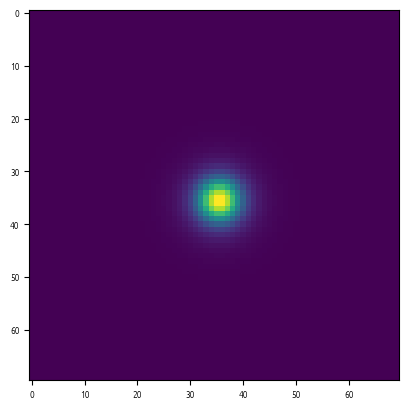

In [23]:
# Generate background normalization image
plt.figure()
back1 = np.nanmean(imagesCentered1, axis=0)
back2 = np.nanmean(imagesCentered2, axis=0)
plt.imshow(back1)
plt.show()

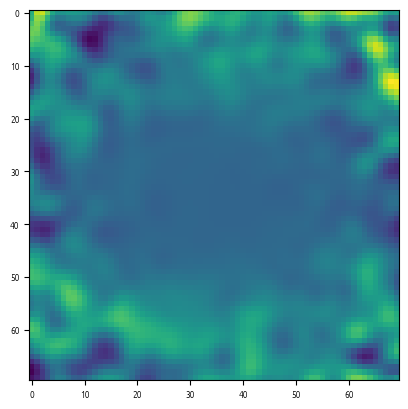

In [24]:
# Compute normalized crops
plt.figure()
imagesDiv1 = imagesCentered1/back1
imagesDiv2 = imagesCentered2/back2
plt.imshow(imagesDiv1[12])
plt.show()

In [25]:
# Generate 2D reconstruction using gaussian weights

gaussianWeights = aux.gaussian2D(cropSizeX,cropSizeY,int(cropSizeX/2),int(cropSizeX/2),sigma=sigmaGauss,muu=0,contrast=0)

recon2DAll1, recon2DAllCount1 = aux.recon2D(imagesDiv1, centersPos1, weights=gaussianWeights)
recon2DAll2, recon2DAllCount2 = aux.recon2D(imagesDiv2, centersPos2, weights=gaussianWeights)

#recon2DAll1, recon2DAllCount1 = aux.recon2D(imagesDiv1, centersPos1)
#recon2DAll2, recon2DAllCount2 = aux.recon2D(imagesDiv2, centersPos2)


36it [00:00, 73.17it/s]
36it [00:00, 81.00it/s]


In [26]:
offsetX = 250 - np.shape(recon2DAll1)[0]
offsetY = 250 - np.shape(recon2DAll1)[1]

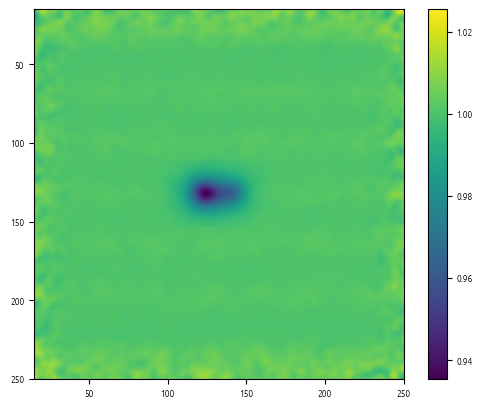

In [27]:
plt.figure()

minValPos = 15

extent = [minValPos , 250, 250, minValPos]

recon2DCrop1 = recon2DAll1[minValPos:,minValPos:]
plt.imshow(recon2DCrop1, extent=extent)
plt.colorbar()

plt.show()

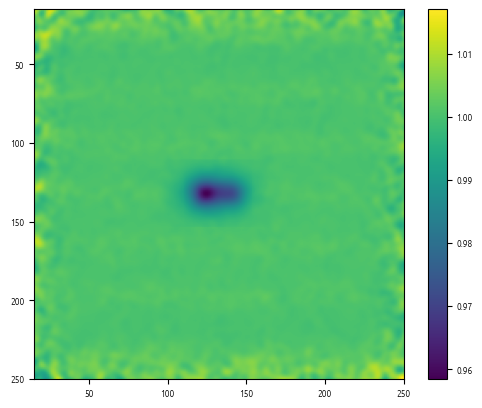

In [28]:
plt.figure()

recon2DCrop2 = recon2DAll2[minValPos:,minValPos:]
plt.imshow(recon2DCrop2, extent=extent)
plt.colorbar()

plt.show()

In [29]:
imRaw = np.zeros((np.shape(recon2DCrop1)[0], np.shape(recon2DCrop1)[1], 2))
imRaw[:,:,0] = recon2DCrop1
imRaw[:,:,1] = recon2DCrop2

lambdas = [660, 830]

cropSize = 100

HbXMaps_2D = hbx.MamoRef_dHbX(imRaw, lambdas, centersPos1, cropSize, cropSize)
    
desOxyMap_2D_Sep2 = HbXMaps_2D[:,:,1]
OxyMap_2D_Sep2 = HbXMaps_2D[:,:,0]
TotMap_2D_Sep2 = desOxyMap_2D_Sep2 + OxyMap_2D_Sep2

Step 1/2...


100%|██████████| 100/100 [00:06<00:00, 15.87it/s]


Step 2/2...


100%|██████████| 36/36 [00:11<00:00,  3.01it/s]


In [30]:
#desOxyMap_2D_filtered = ndimage.median_filter(desOxyMap_2D,0)
#OxyMap_2D_filtered = ndimage.median_filter(OxyMap_2D,0)

desOxyMap_2D_filtered_Sep2 = desOxyMap_2D_Sep2
OxyMap_2D_filtered_Sep2 = OxyMap_2D_Sep2

desOxyMap_2D_filtered_Sep2[desOxyMap_2D_filtered_Sep2==np.nan] = 0
OxyMap_2D_filtered_Sep2[OxyMap_2D_filtered_Sep2==np.nan] = 0

In [31]:
sep = 15
size = 250

xPosInc1 = int(np.shape(OxyMap_2D_filtered_Sep2)[0]/2 - sep/2)
xPosInc2 = int(np.shape(OxyMap_2D_filtered_Sep2)[0]/2 + sep/2)
yPosInc1 = yPosInc2 = int(np.shape(OxyMap_2D_filtered_Sep2)[1]/2)
print(xPosInc1,xPosInc2)

posSep2Inc1 = [yPosInc1, xPosInc1]
posSep2Inc2 = [yPosInc2, xPosInc2]
satSep2Inc1 = aux.O2Sat(OxyMap_2D_filtered_Sep2[posSep2Inc1[0],posSep2Inc1[1]], desOxyMap_2D_filtered_Sep2[posSep2Inc1[0],posSep2Inc1[1]])
satSep2Inc2 = aux.O2Sat(OxyMap_2D_filtered_Sep2[posSep2Inc2[0],posSep2Inc2[1]], desOxyMap_2D_filtered_Sep2[posSep2Inc2[0],posSep2Inc2[1]])

print("O2 Saturation. Inclusion 1: {}".format(satSep2Inc1))
print("O2 Saturation. Inclusion 2: {}".format(satSep2Inc2))

102 117
O2 Saturation. Inclusion 1: 64.0
O2 Saturation. Inclusion 2: 70.0


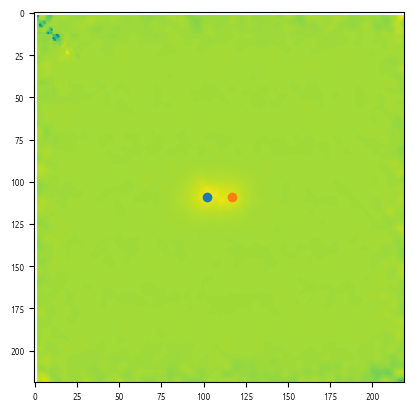

In [32]:
plt.figure()
plt.imshow(OxyMap_2D_filtered_Sep2)
plt.scatter(posSep2Inc1[1],posSep2Inc1[0])
plt.scatter(posSep2Inc2[1],posSep2Inc2[0])
plt.show()

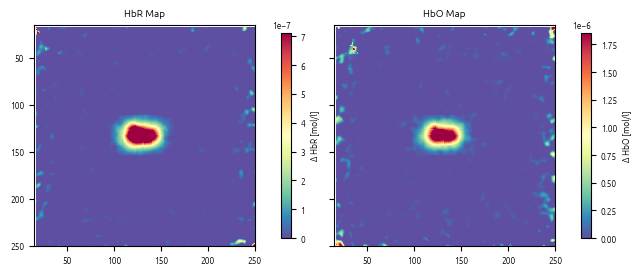

In [33]:
colorMap = "Spectral_r"
    
font = {'family' : 'ubuntu',
        'weight' : 'regular',
        'size'   : 6}

mp.rc('font', **font)

if doTotMap:
        figSats, ((DesOxy, Oxy, Tot)) = plt.subplots(1, 3, sharex=True, sharey=True)
        font["size"] = 6
        mp.rc('font', **font)
else:
        figSats, ((DesOxy,Oxy)) = plt.subplots(1, 2, sharex=True, sharey=True)

sd = np.nanstd(desOxyMap_2D_filtered_Sep2)
median = np.nanmedian(desOxyMap_2D_filtered_Sep2)
vmax = median + maxDev * sd
vmin = 0

figDesOxy = DesOxy.imshow(desOxyMap_2D_filtered_Sep2, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
c1 = figSats.colorbar(figDesOxy, ax=DesOxy, fraction=0.04, pad=0.1)
c1.set_label("Δ HbR [mol/l]")

sd = np.nanstd(OxyMap_2D_filtered_Sep2)
median = np.nanmedian(OxyMap_2D_filtered_Sep2)
vmax = median + maxDev * sd
vmin = 0


figOxy = Oxy.imshow(OxyMap_2D_filtered_Sep2, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
c2 = figSats.colorbar(figOxy, ax=Oxy, fraction=0.04, pad=0.1)
c2.set_label("Δ HbO [mol/l]")

if doTotMap:
        TotMap_2D_Sep2 = desOxyMap_2D_filtered_Sep2 + OxyMap_2D_filtered_Sep2

        sd = np.nanstd(TotMap_2D_Sep2)
        median = np.nanmedian(TotMap_2D_Sep2)
        vmax = median + maxDev * sd
        vmin = 0


        figTot = Tot.imshow(TotMap_2D_Sep2, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
        c3 = figSats.colorbar(figTot, ax=Tot, fraction=0.04, pad=0.1)
        c3.set_label("Δ HbTot [mol/l]")

        Tot.set_title("Total HB HBMap")


DesOxy.set_title("HbR Map")

Oxy.set_title("HbO Map")

figSats.tight_layout()

figSats.savefig("MC2Incs_HbXMaps_MultiSep_Sep2.png", dpi=300)

# Separation  3

In [34]:
# Perfom smoothing

for i in range(shapeImagesMC1_Sep3[0]):
    imagesMC1_Sep3[i] = aux.fftGauss(imagesMC1_Sep3[i], fftStrength)[0]
    
for i in range(shapeImagesMC2_Sep3[0]):
    imagesMC2_Sep3[i] = aux.fftGauss(imagesMC2_Sep3[i], fftStrength)[0]

In [35]:
# Compute source centers

centersPos1 = np.empty((shapeImagesMC1_Sep3[0],2))
centersPos2 = np.empty((shapeImagesMC2_Sep3[0],2))

for i in range(shapeImagesMC1_Sep3[0]):
    centersPos1[i] = aux.maxPosCm(imagesMC1_Sep3[i], smooth=0)
    
for i in range(shapeImagesMC2_Sep3[0]):
    centersPos2[i] = aux.maxPosCm(imagesMC2_Sep3[i], smooth=0)

In [36]:
# Compute centered crops

imagesCentered1 = []
imagesCentered2 = []

for i, image in enumerate(imagesMC1_Sep3):
    imageTemp = aux.cropAroundPosition(image, round(centersPos1[i][1]), round(centersPos1[i][0]), cropSizeX, cropSizeY) 
    imagesCentered1.append(imageTemp) 

for i, image in enumerate(imagesMC2_Sep3):
    imageTemp = aux.cropAroundPosition(image, round(centersPos2[i][1]), round(centersPos2[i][0]), cropSizeX, cropSizeY) 
    imagesCentered2.append(imageTemp)  

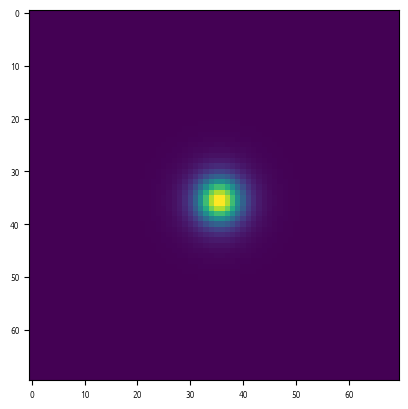

In [37]:
# Generate background normalization image
plt.figure()
back1 = np.nanmean(imagesCentered1, axis=0)
back2 = np.nanmean(imagesCentered2, axis=0)
plt.imshow(back1)
plt.show()

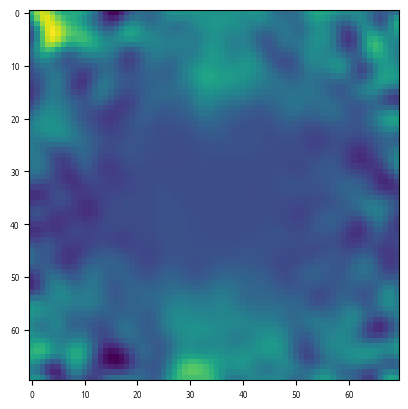

In [38]:
# Compute normalized crops

plt.figure()
imagesDiv1 = imagesCentered1/back1
imagesDiv2 = imagesCentered2/back2
plt.imshow(imagesDiv1[12])

In [39]:
# Generate 2D reconstruction using gaussian weights

gaussianWeights = aux.gaussian2D(cropSizeX,cropSizeY,int(cropSizeX/2),int(cropSizeX/2),sigma=sigmaGauss,muu=0,contrast=0)

recon2DAll1, recon2DAllCount1 = aux.recon2D(imagesDiv1, centersPos1, weights=gaussianWeights)
recon2DAll2, recon2DAllCount2 = aux.recon2D(imagesDiv2, centersPos2, weights=gaussianWeights)

#recon2DAll1, recon2DAllCount1 = aux.recon2D(imagesDiv1, centersPos1)
#recon2DAll2, recon2DAllCount2 = aux.recon2D(imagesDiv2, centersPos2)


36it [00:00, 77.53it/s]
36it [00:00, 77.77it/s]


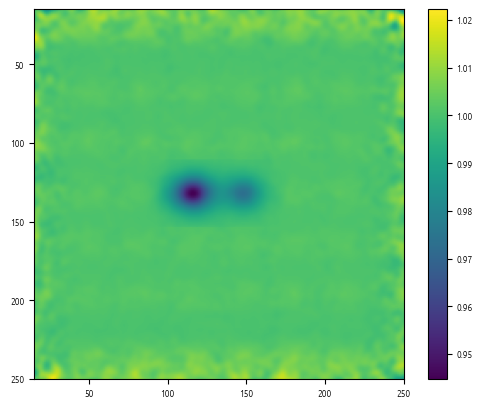

In [40]:
plt.figure()
minValPos = 15

extent = [minValPos , 250, 250, minValPos]

recon2DCrop1 = recon2DAll1[minValPos:,minValPos:]
plt.imshow(recon2DCrop1, extent=extent)
plt.colorbar()

plt.show()

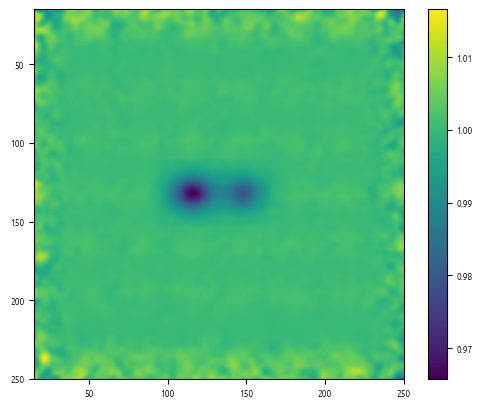

In [41]:
plt.figure()

recon2DCrop2 = recon2DAll2[minValPos:,minValPos:]
plt.imshow(recon2DCrop2, extent=extent)
plt.colorbar()

plt.show()

In [42]:
imRaw = np.zeros((np.shape(recon2DCrop1)[0], np.shape(recon2DCrop1)[1], 2))
imRaw[:,:,0] = recon2DCrop1
imRaw[:,:,1] = recon2DCrop2

lambdas = [660, 830]

cropSize = 100

HbXMaps_2D = hbx.MamoRef_dHbX(imRaw, lambdas, centersPos1, cropSize, cropSize)
    
desOxyMap_2D_Sep3 = HbXMaps_2D[:,:,1]
OxyMap_2D_Sep3 = HbXMaps_2D[:,:,0]
TotMap_2D_Sep3 = desOxyMap_2D_Sep3 + OxyMap_2D_Sep3

Step 1/2...


100%|██████████| 100/100 [00:06<00:00, 15.35it/s]


Step 2/2...


100%|██████████| 36/36 [00:12<00:00,  2.97it/s]


In [43]:
#desOxyMap_2D_filtered = ndimage.median_filter(desOxyMap_2D,0)
#OxyMap_2D_filtered = ndimage.median_filter(OxyMap_2D,0)

desOxyMap_2D_filtered_Sep3 = desOxyMap_2D_Sep3
OxyMap_2D_filtered_Sep3 = OxyMap_2D_Sep3

desOxyMap_2D_filtered_Sep3[desOxyMap_2D_filtered_Sep3==np.nan] = 0
OxyMap_2D_filtered_Sep3[OxyMap_2D_filtered_Sep3==np.nan] = 0

In [44]:
sep = 20
size = 250

xPosInc1 = int(np.shape(OxyMap_2D_filtered_Sep3)[0]/2 - sep/2)
xPosInc2 = int(np.shape(OxyMap_2D_filtered_Sep3)[0]/2 + sep/2)
yPosInc1 = yPosInc2 = int(np.shape(OxyMap_2D_filtered_Sep3)[1]/2)
print(xPosInc1,xPosInc2)

posSep3Inc1 = [yPosInc1, xPosInc1]
posSep3Inc2 = [yPosInc2, xPosInc2]
satSep3Inc1 = aux.O2Sat(OxyMap_2D_filtered_Sep3[posSep3Inc1[0],posSep3Inc1[1]], desOxyMap_2D_filtered_Sep3[posSep3Inc1[0],posSep3Inc1[1]])
satSep3Inc2 = aux.O2Sat(OxyMap_2D_filtered_Sep3[posSep3Inc2[0],posSep3Inc2[1]], desOxyMap_2D_filtered_Sep3[posSep3Inc2[0],posSep3Inc2[1]])

print("O2 Saturation. Inclusion 1: {}".format(satSep3Inc1))
print("O2 Saturation. Inclusion 2: {}".format(satSep3Inc2))

99 119
O2 Saturation. Inclusion 1: 64.0
O2 Saturation. Inclusion 2: 70.0


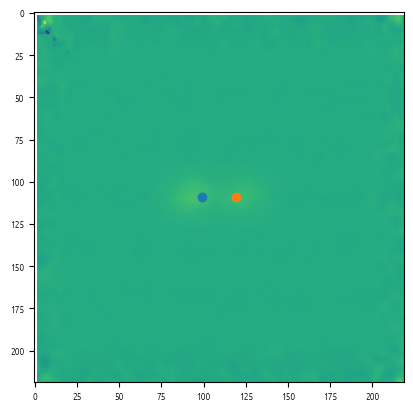

In [45]:
plt.figure()
plt.imshow(OxyMap_2D_filtered_Sep3)
plt.scatter(posSep3Inc1[1],posSep1Inc1[0])
plt.scatter(posSep3Inc2[1],posSep1Inc2[0])
plt.show()

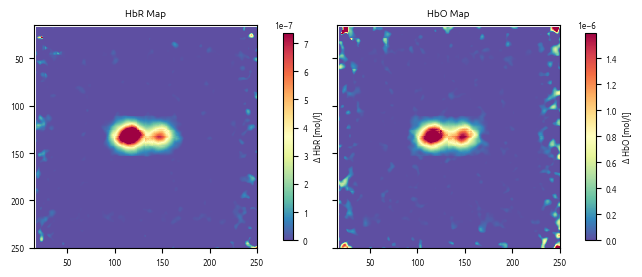

In [46]:
_Sep3colorMap = "Spectral_r"
    
font = {'family' : 'ubuntu',
        'weight' : 'regular',
        'size'   : 6}

mp.rc('font', **font)

if doTotMap:
        figSats, ((DesOxy, Oxy, Tot)) = plt.subplots(1, 3, sharex=True, sharey=True)
        font["size"] = 6
        mp.rc('font', **font)
else:
        figSats, ((DesOxy,Oxy)) = plt.subplots(1, 2, sharex=True, sharey=True)

sd = np.nanstd(desOxyMap_2D_filtered_Sep3)
median = np.nanmedian(desOxyMap_2D_filtered_Sep3)
vmax = median + maxDev * sd
vmin = 0

figDesOxy = DesOxy.imshow(desOxyMap_2D_filtered_Sep3, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
c1 = figSats.colorbar(figDesOxy, ax=DesOxy, fraction=0.04, pad=0.1)
c1.set_label("Δ HbR [mol/l]")

sd = np.nanstd(OxyMap_2D_filtered_Sep3)
median = np.nanmedian(OxyMap_2D_filtered_Sep3)
vmax = median + maxDev * sd
vmin = 0


figOxy = Oxy.imshow(OxyMap_2D_filtered_Sep3, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
c2 = figSats.colorbar(figOxy, ax=Oxy, fraction=0.04, pad=0.1)
c2.set_label("Δ HbO [mol/l]")

if doTotMap:
        TotMap_2D_Sep3 = desOxyMap_2D_filtered_Sep3 + OxyMap_2D_filtered_Sep3

        sd = np.nanstd(TotMap_2D_Sep3)
        median = np.nanmedian(TotMap_2D_Sep3)
        vmax = median + maxDev * sd
        vmin = 0


        figTot = Tot.imshow(TotMap_2D_Sep3, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
        c3 = figSats.colorbar(figTot, ax=Tot, fraction=0.04, pad=0.1)
        c3.set_label("Δ HbTot [mol/l]")

        Tot.set_title("Total HB HBMap")


DesOxy.set_title("HbR Map")

Oxy.set_title("HbO Map")

figSats.tight_layout()

figSats.savefig("MC2Incs_HbXMaps_MultiSep_Sep3.png", dpi=300)

In [47]:
posSep1Inc1

[109, 104]

1.2839184459592225e-06 2.5216676653925255e-07


/home/nicolas/Bionirs/MamoRefCodePublic/auxFuncs.py:103: ComplexWarning: Casting complex values to real discards the imaginary part
  im_output[~in_NaNs] = im_filtered[~in_NaNs]


(0.0, 250.0)

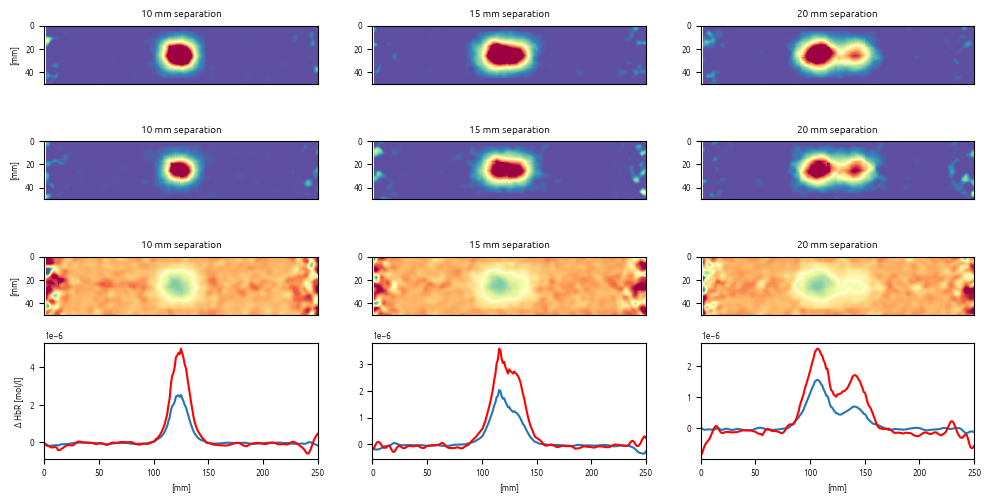

In [64]:
minValPos = 15
vertSize = 25
offsetX = offsetY = int((size-np.shape(desOxyMap_2D_filtered_Sep1)[0])/2)

midVertPoint = int(np.shape(desOxyMap_2D_filtered_Sep1)[0]/2)

extent = [minValPos, 250, vertSize*2, 0]

if doSatMap:
    fig, axs = plt.subplots(4, 3, figsize=(12, 6))
else:
    fig, axs = plt.subplots(3, 3, figsize=(12, 6))

plt.subplots_adjust(hspace=0.)  # Adjust the vertical spacing between subplots

sd = np.nanstd(desOxyMap_2D_filtered_Sep1)
median = np.nanmedian(desOxyMap_2D_filtered_Sep1)
vmax = median + maxDev * sd
vmin = 0
axs[0, 0].imshow(desOxyMap_2D_filtered_Sep1[midVertPoint-vertSize:midVertPoint +
                 vertSize, :], vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
axs[0, 0].set_title("10 mm separation")
axs[0, 0].set_ylabel("[mm]")
axs[0, 0].get_xaxis().set_visible(False)
# axs[0, 0].scatter(posSep1Inc1[1]+1.5*offsetX, vertSize, marker="x", c="green")
# axs[0, 0].annotate(str(satSep1Inc1), xy=(posSep1Inc1[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")
# axs[0, 0].scatter(posSep1Inc2[1]+1.5*offsetX, vertSize, marker="x", c="green")
# axs[0, 0].annotate(str(satSep1Inc2), xy=(posSep1Inc2[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")

sd = np.nanstd(desOxyMap_2D_filtered_Sep2)
median = np.nanmedian(desOxyMap_2D_filtered_Sep2)
vmax = median + maxDev * sd
vmin = 0
axs[0, 1].imshow(desOxyMap_2D_filtered_Sep2[midVertPoint-vertSize:midVertPoint +
                 vertSize, :], vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
axs[0, 1].set_title("15 mm separation")
axs[0, 1].get_xaxis().set_visible(False)


# axs[0, 1].scatter(posSep2Inc1[1]+offsetX, vertSize, marker="x", c="green")
# axs[0, 1].annotate(str(satSep2Inc1), xy=(posSep2Inc1[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")
# axs[0, 1].scatter(posSep2Inc2[1]+offsetX, vertSize, marker="x", c="green")
# axs[0, 1].annotate(str(satSep2Inc2), xy=(posSep2Inc2[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")

sd = np.nanstd(desOxyMap_2D_filtered_Sep3)
median = np.nanmedian(desOxyMap_2D_filtered_Sep3)
vmax = median + maxDev * sd
vmin = 0
axs[0, 2].imshow(desOxyMap_2D_filtered_Sep3[midVertPoint-vertSize:midVertPoint +
                 vertSize, :], vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
axs[0, 2].set_title("20 mm separation")
axs[0, 2].get_xaxis().set_visible(False)
# axs[0, 2].scatter(posSep3Inc1[1]+offsetX, vertSize, marker="x", c="green")
# axs[0, 2].annotate(str(satSep1Inc1), xy=(posSep3Inc1[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")
# axs[0, 2].scatter(posSep3Inc2[1]+offsetX, vertSize, marker="x", c="green")
# axs[0, 2].annotate(str(satSep3Inc2), xy=(posSep3Inc2[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")


sd = np.nanstd(OxyMap_2D_filtered_Sep1)
median = np.nanmedian(OxyMap_2D_filtered_Sep1)
vmax = median + maxDev * sd
vmin = 0
axs[1, 0].imshow(OxyMap_2D_filtered_Sep1[midVertPoint-vertSize:midVertPoint +
                 vertSize, :], vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
axs[1, 0].set_title("10 mm separation")
axs[1, 0].set_ylabel("[mm]")
axs[1, 0].get_xaxis().set_visible(False)
# axs[1, 0].scatter(posSep1Inc1[1]+offsetX, vertSize, marker="x", c="green")
# axs[1, 0].annotate(str(satSep1Inc1), xy=(posSep1Inc1[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")
# axs[1, 0].scatter(posSep1Inc2[1]+offsetX, vertSize, marker="x", c="green")
# axs[1, 0].annotate(str(satSep1Inc2), xy=(posSep1Inc2[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")


sd = np.nanstd(OxyMap_2D_filtered_Sep2)
median = np.nanmedian(OxyMap_2D_filtered_Sep2)
vmax = median + maxDev * sd
vmin = 0
axs[1, 1].imshow(OxyMap_2D_filtered_Sep2[midVertPoint-vertSize:midVertPoint +
                 vertSize, :], vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
axs[1, 1].set_title("15 mm separation")
axs[1, 1].get_xaxis().set_visible(False)
# axs[1, 1].scatter(posSep2Inc1[1]+offsetX, vertSize, marker="x", c="green")
# axs[1, 1].annotate(str(satSep2Inc1), xy=(posSep2Inc1[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")
# axs[1, 1].scatter(posSep2Inc2[1]+offsetX, vertSize, marker="x", c="green")
# axs[1, 1].annotate(str(satSep2Inc2), xy=(posSep2Inc2[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")

sd = np.nanstd(OxyMap_2D_filtered_Sep3)
median = np.nanmedian(OxyMap_2D_filtered_Sep3)
vmax = median + maxDev * sd
vmin = 0
axs[1, 2].imshow(OxyMap_2D_filtered_Sep3[midVertPoint-vertSize:midVertPoint +
                 vertSize, :], vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
axs[1, 2].set_title("20 mm separation")
axs[1, 2].get_xaxis().set_visible(False)
# axs[1, 2].scatter(posSep3Inc1[1]+offsetX, vertSize, marker="x", c="green")
# axs[1, 2].annotate(str(satSep1Inc1), xy=(posSep3Inc1[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")
# axs[1, 2].scatter(posSep3Inc2[1]+offsetX, vertSize, marker="x", c="green")
# axs[1, 2].annotate(str(satSep3Inc2), xy=(posSep3Inc2[1]+1.5 *
#                   offsetX, vertSize), xytext=(10, 10), textcoords="offset pixels")


""" prof_Sep1 = np.pad(desOxyMap_2D_filtered_Sep1[midVertPoint, :], (int(
    (250-np.shape(desOxyMap_2D_filtered_Sep1)[0])/2), int((250-np.shape(desOxyMap_2D_filtered_Sep1)[0])/2)), mode="edge")
prof_Sep2 = np.pad(desOxyMap_2D_filtered_Sep2[midVertPoint, :], (int(
    (250-np.shape(desOxyMap_2D_filtered_Sep2)[0])/2), int((250-np.shape(desOxyMap_2D_filtered_Sep2)[0])/2)), mode="edge")
prof_Sep3 = np.pad(desOxyMap_2D_filtered_Sep3[midVertPoint, :], (int(
    (250-np.shape(desOxyMap_2D_filtered_Sep3)[0])/2), int((250-np.shape(desOxyMap_2D_filtered_Sep3)[0])/2)), mode="edge") """


if doSatMap:

    HbOminVal = np.abs(np.nanmin(aux.fftGauss(OxyMap_2D_filtered_Sep1, 10)[0]))
    HbRminVal = np.abs(np.nanmin(aux.fftGauss(desOxyMap_2D_filtered_Sep1, 10)[0]))
    print(HbOminVal, HbRminVal)

    O2SatMap_Sep1 = (OxyMap_2D_filtered_Sep1+HbOminVal)/((OxyMap_2D_filtered_Sep1 +
                                                          HbOminVal) + (desOxyMap_2D_filtered_Sep1+HbRminVal))
    O2SatMap_Sep2 = (OxyMap_2D_filtered_Sep2+HbOminVal)/((OxyMap_2D_filtered_Sep2 +
                                                          HbOminVal) + (desOxyMap_2D_filtered_Sep2+HbRminVal))
    O2SatMap_Sep3 = (OxyMap_2D_filtered_Sep3+HbOminVal)/((OxyMap_2D_filtered_Sep3 +
                                                          HbOminVal) + (desOxyMap_2D_filtered_Sep3+HbRminVal))
    vmax = 95
    vmin = 60
    axs[2, 0].imshow(O2SatMap_Sep1[midVertPoint-vertSize:midVertPoint +
                                   vertSize, :]*100, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
    axs[2, 0].set_title("10 mm separation")
    axs[2, 0].set_ylabel("[mm]")
    axs[2, 0].get_xaxis().set_visible(False)

    axs[2, 1].imshow(O2SatMap_Sep2[midVertPoint-vertSize:midVertPoint +
                                   vertSize, :]*100, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
    axs[2, 1].set_title("15 mm separation")
    axs[2, 1].get_xaxis().set_visible(False)

    axs[2, 2].imshow(O2SatMap_Sep3[midVertPoint-vertSize:midVertPoint +
                                   vertSize, :]*100, vmin=vmin, vmax=vmax, cmap=mp.colormaps[colorMap], extent=extent)
    axs[2, 2].set_title("20 mm separation")
    axs[2, 2].get_xaxis().set_visible(False)


prof_HbR_Sep1 = desOxyMap_2D_filtered_Sep1[midVertPoint, :]
prof_HbR_Sep2 = desOxyMap_2D_filtered_Sep2[midVertPoint, :]
prof_HbR_Sep3 = desOxyMap_2D_filtered_Sep3[midVertPoint, :]

prof_HbO_Sep1 = OxyMap_2D_filtered_Sep1[midVertPoint, :]
prof_HbO_Sep2 = OxyMap_2D_filtered_Sep2[midVertPoint, :]
prof_HbO_Sep3 = OxyMap_2D_filtered_Sep3[midVertPoint, :]

x_scale = np.linspace(0, 250, np.shape(desOxyMap_2D_Sep1)[0])

if doSatMap:
    axsNro = 3
else:
    axsNro = 2

axs[axsNro, 0].plot(x_scale, prof_HbR_Sep1)
axs[axsNro, 0].plot(x_scale, prof_HbO_Sep1, c="red")
axs[axsNro, 0].set_xlabel("[mm]")
axs[axsNro, 0].set_ylabel("Δ HbR [mol/l]")
axs[axsNro, 0].set_xlim(0, 250)

axs[axsNro, 1].plot(x_scale, prof_HbR_Sep2)
axs[axsNro, 1].plot(x_scale, prof_HbO_Sep2, c="red")
axs[axsNro, 1].set_xlabel("[mm]")
axs[axsNro, 1].set_xlim(0, 250)

axs[axsNro, 2].plot(x_scale, prof_HbR_Sep3)
axs[axsNro, 2].plot(x_scale, prof_HbO_Sep3, c="red")
axs[axsNro, 2].set_xlabel("[mm]")
axs[axsNro, 2].set_xlim(0, 250)


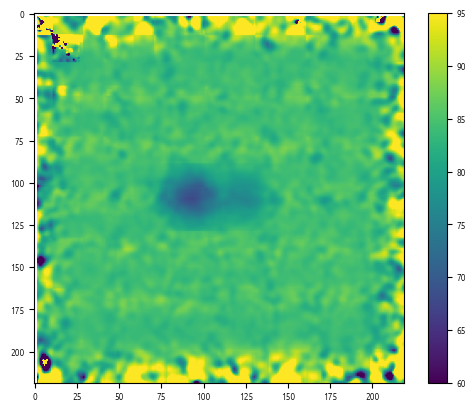

In [65]:
plt.figure()
plt.imshow(O2SatMap_Sep3*100, vmin=60,vmax=95)
plt.colorbar()
plt.show()